<a href="https://colab.research.google.com/github/RodrigoSchneiderr/Portfolio/blob/main/Treinando_uma_Rede_Neural_Deep_Learning_com_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [136]:
import torch
from torch import nn

In [137]:
# Conferir o dispositivo de hardware está disponível para uso. Foi alterado para GPU nas conficurações.

if torch.cuda.is_available():
  device = torch.device('cuda')
else:
  device = torch.device('cpu')
print(device)

cpu


In [138]:
# Importando conjunto de dados já prontos de uma base https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine.

from sklearn import datasets

wine = datasets.load_wine()
data = wine.data
target = wine.target

print(data.shape, target.shape)
print(wine.feature_names, wine.target_names)

(178, 13) (178,)
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline'] ['class_0' 'class_1' 'class_2']


In [139]:
# Instanciar um MLP com uma camada escondida e uma camada de saída.
# Arquitetura.
class WineClassifier(nn.Module):

  def __init__(self, input_size, hidden_size, output_size):  #duas funções obrigatórias "__init__ e forward"
    super(WineClassifier, self).__init__()

    self.hidden  = nn.Linear(input_size, hidden_size)  #camada escondida
    self.relu    = nn.ReLU()                           #função de ativação
    self.out     = nn.Linear(hidden_size, out_size)    #camada de saída
    self.softmax = nn.Softmax()                        #transformar saídas em distribuições de probabilidades

  def forward(self, X):

    feature = self.relu(self.hidden(X))               #ativação da camada intermediária
    output  = self.softmax(self.out(feature))         #ativação da camada de saída

    return output

# Definição da rede.
input_size  = data.shape[1]                 #quantidade de features que tenho
hidden_size = 32                            #escolha minha, definição de neuronios
out_size    = len(wine.target_names)        #quantidade de classes que tenho

net = WineClassifier(input_size, hidden_size, out_size).to(device)  #cast na GPU




In [140]:
# Imprimir a rede.
print(net)

WineClassifier(
  (hidden): Linear(in_features=13, out_features=32, bias=True)
  (relu): ReLU()
  (out): Linear(in_features=32, out_features=3, bias=True)
  (softmax): Softmax(dim=None)
)


In [141]:
# Instanciar uma função de perda.
criterion = nn.CrossEntropyLoss().to(device)  #cast na GPU ".to(device)"

In [142]:
# Transformação dos dados em tensores.
Xtns = torch.from_numpy(data).float()
Ytns = torch.from_numpy(target)

# Cast na GPU
Xtns = Xtns.to(device)
Ytns = Ytns.to(device)

print(Xtns.dtype, Ytns.dtype)

torch.float32 torch.int64


In [143]:
# Passar na rede
# Predição
pred = net(Xtns)

In [144]:
# Comparar as dimensionalidades da dimensão com a dimensionalidade do rótulo.
print (pred.shape, Ytns.shape)

print (pred[0].data, Ytns[0].data)

torch.Size([178, 3]) torch.Size([178])
tensor([1.0000e+00, 2.9938e-21, 9.5228e-22]) tensor(0)


In [145]:
# Rodar a Loss "A Loss sempre será um valor escalar que vai indicar o erro em um conjunto de dados"
# Calcula a perda média de todos os valores
loss = criterion(pred, Ytns)  #parametrô predição "pred" e rótulo "Ytns"
print(loss)


# Calcula o rótulo de uma classe "Unica predição com um único rótulo" - média
# loss = criterion(pred[0].unsqueeze(0), Ytns[0].unsqueeze(0))
# print(loss)

# Calcula o rótulo de uma classe da amostra 1 até a amostra 30 - média
# loss = criterion(pred[:30].unsqueeze(0), Ytns[:30].unsqueeze(0))
# print(loss)



tensor(1.2200, grad_fn=<NllLossBackward0>)


In [146]:
# REGRESSÃO
# Vamos trabalhar com o dataset de Diabetes, cujo objetivo é prever a progressão da diabetes em um paciente.
# Utilizar os dados já disponíveis em https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes

from sklearn import datasets

diabetes = datasets.load_diabetes()
data = diabetes.data
target = diabetes.target

print(data.shape, target.shape)

print(data[0], target[0])

# Resultado: 442 amostras, 10 características para cada amostra, 442 rótulos com valores contínuos, não será classes 0, 1, 2 ... Será 25, 125, 140...
# Como ver uma amostra aleatória:
# print(data[14])
# target[14])

(442, 10) (442,)
[ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990749 -0.01764613] 151.0


In [147]:
# Instanciar um MLP com uma camada escondida e uma camada de saída.
# Arquitetura.
class WineClassifier(nn.Module):

  def __init__(self, input_size, hidden_size, output_size):  #duas funções obrigatórias "__init__ e forward"
    super(WineClassifier, self).__init__()

    self.hidden  = nn.Linear(input_size, hidden_size)  #camada escondida
    self.relu    = nn.ReLU()                           #função de ativação
    self.out     = nn.Linear(hidden_size, out_size)    #camada de saída
    self.softmax = nn.Softmax(-1)                        #transformar saídas em distribuições de probabilidades

  def forward(self, X):

    feature = self.relu(self.hidden(X))               #ativação da camada intermediária
    output  = self.softmax(self.out(feature))         #ativação da camada de saída

    return output

# Definição da rede.
input_size  = data.shape[1]                 #segunda dimensão do shape é o número de característica de entrada
hidden_size = 32                            #escolha minha, definição de neuronios
out_size    = 1                             #como queremos fazer a regressão, será uma váriável, porque vamosfazer a regressão somente da progressão da diabetes. Se quiséssemos fazer a progressão da diabetes e como estará a pressão sanguinea da pessoa daqui um anos, seriam duas variaveis.

net = WineClassifier(input_size, hidden_size, out_size).to(device)  #cast na GPU

In [148]:
# Definição da função de perda MSE (Mean Squared Error)
criterium = nn.MSELoss().to(device)   #métoodo de critério de regressão

# Cast na GPU
Xtns = torch.from_numpy(data).float().to(device)   #converter para float ".float()" e sobir para GPU ".to(device)"
Ytns = torch.from_numpy(target).float().to(device)

print(Xtns.shape, Ytns.shape)

torch.Size([442, 10]) torch.Size([442])


In [149]:
# Forward na rede
pred = net(Xtns)

loss = criterium(pred.squeeze(), Ytns)
print(loss.data)

tensor(28771.2148)


In [150]:
# Definição da função de perda L1 (perda de distância absoluta)
criterium = nn.L1Loss().to(device)

# Cast na GPU
Xtns = torch.from_numpy(data).float().to(device)   #converter para float ".float()" e sobir para GPU ".to(device)"
Ytns = torch.from_numpy(target).float().to(device)

print(Xtns.shape, Ytns.shape)

# Forward na rede
pred = net(Xtns)

loss = criterium(pred.squeeze(), Ytns)
print(loss.data)

torch.Size([442, 10]) torch.Size([442])
tensor(151.1335)


Text(0, 0.5, 'color_intensity')

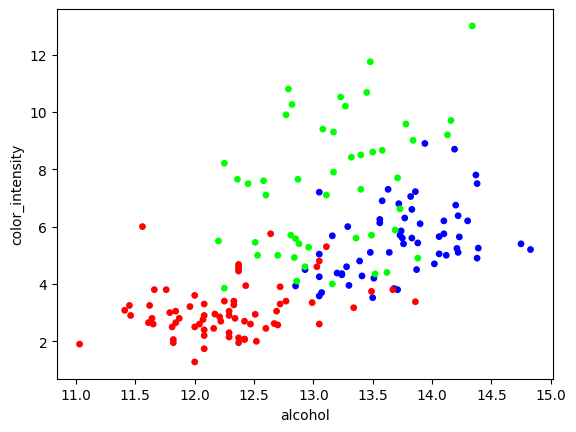

In [151]:
# Otimização
#Para entender melhor o processo de otimização, vamos utilizar um dataset de classificação de vinhos. A classificação é feita com base em análises químicas realizadas em três diferentes cultivos na mesma região da Itália.
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine

from sklearn import datasets
import matplotlib.pyplot as plt                 # para fazer as plotagens

features = [0, 9]   # foi selecionado duas características dos vinhos "teor alcoolico e intensidade da cor" estão nos indices 0 e 9 dos dados

wine = datasets.load_wine()
data = wine.data[:, features]
targets = wine.target

plt.scatter(data[:, 0], data[:, 1], c=targets, s=15, cmap=plt.cm.brg)   #plotar a figura
plt.xlabel(wine.feature_names[features[0]])                             #legenda de X
plt.ylabel(wine.feature_names[features[1]])                             #legenda de Y

Text(0, 0.5, 'color_intensity')

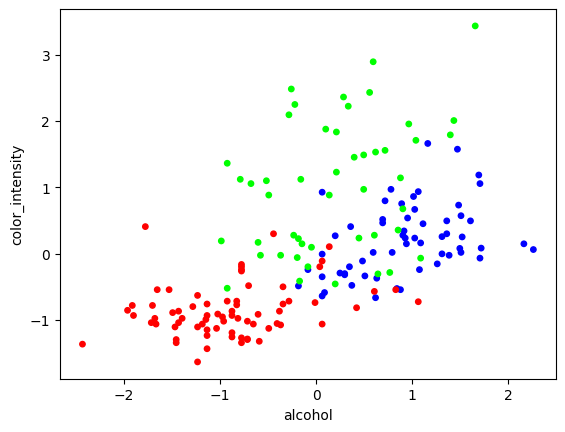

In [152]:
#Normalizar os dados

from sklearn.preprocessing import StandardScaler  #biblioteca para normalização dos dados e também é visto como boas práticas

scaler = StandardScaler()
data = scaler.fit_transform(data)

plt.scatter(data[:, 0], data[:, 1], c=targets, s=15, cmap=plt.cm.brg)   #plotar a figura
plt.xlabel(wine.feature_names[features[0]])                             #legenda de X
plt.ylabel(wine.feature_names[features[1]])

In [153]:
# Instanciar a rede

import torch
from torch import nn

if torch.cuda.is_available():
  device = torch.device('cuda')
else:
  device = torch.device('cpu')

print(device)

input_size = data.shape[1]
hidden_size = 32
out_size = len(wine.target_names)     #número de classes

net = nn.Sequential(
    nn.Linear(input_size, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, out_size),
    nn.Softmax()
)

cpu


In [154]:
# Vizualizando a fronteira de decisão
# Função para auxiliar para plot da fronteira de decisão do classificador

import numpy as np

def plot_boundary(X, y, model):
  x_min, x_max = X[:, 0].min()-0.1, X[:, 0].max()+0.1
  y_min, y_max = X[:, 1].min()-0.1, X[:, 1].max()+0.1

  spacing = min(x_max - x_min, y_max - y_min) / 100

  XX, YY = np.meshgrid(np.arange(x_min, x_max, spacing),
                       np.arange(y_min, y_max, spacing))

  data = np.hstack((XX.ravel().reshape(-1,1),
                    YY.ravel().reshape(-1,1)))

  # For binary problems
  # db_prob = model(Variable(torch.Tensor(data)).cuda() )
  # clf = np.where(db_prob.cpu().data < 0.5,0,1)

  # For multi-class problems
  db_prob = model(torch.Tensor(data).to(device) )
  clf = np.argmax(db_prob.cpu().data.numpy(), axis=-1)

  Z = clf.reshape(XX.shape)

  plt.contourf(XX, YY, Z, cmap=plt.cm.brg, alpha=0.5)
  plt.scatter(X[:,0], X[:,1], c=y, edgecolors='k', s=25, cmap=plt.cm.brg)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1532: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


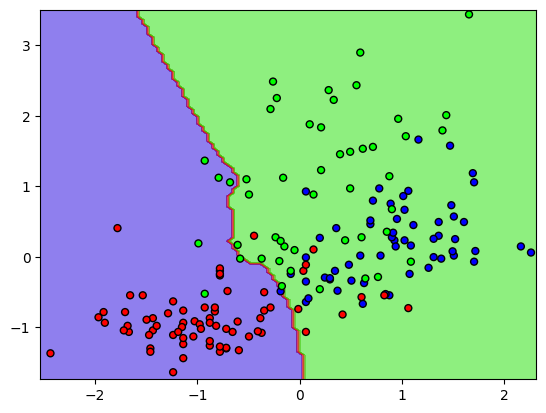

In [155]:
plot_boundary(data, targets, net)   # como está pegando dados aleatórios, as amostragens no gráfico não fazem sentido. Por isso precisa otimizar a fronteira de decisão para separar os grupos de dados (separar as três classes de vinho)

In [156]:
# Otimização do processo
from torch import optim      # Biblioteca que possui a implementação dos otimizadores

# Função de perda
criterion = nn.CrossEntropyLoss().to(device)

# Otimizador: Descida do Gradiente
# Stochastic Gradient Descent
optimizer = optim.SGD(net.parameters(), lr=1e-3)      # Momento que devemos interferir com valor em taxa de aprendizagem 'lr'

In [157]:
# Transformar dados para tensores e subir eles na GPU
X = torch.FloatTensor(data).to(device)    #GPU
Y = torch.LongTensor(targets).to(device)  #GPU

In [160]:
# TREINANDO UM MODELO
# O treinamento consiste nas seguintes etapdas:
# Forward:
# - Alimentar os dados para a rede
#   pred = net(X)
# - Calcular a função de custo
#   loss = criterion(pred, Y)
# Backpropagation
# - Calcular o gradiante
#   loss.backward()
# - Atualizar os pesos
#   optimizer.step()

for i in range(100):         # 100 interações de otimização. Em alguns casos vai a milhares

  # Forward
  pred = net(X)
  loss = criterion(pred, Y)

  # Backward
  loss.backward()
  optimizer.step()

if i % 10 == 0:           # gerar uma nova figura a cada "10 interações"
  plt.figure()
  plot_boundary(data, targets, net)

In [161]:
# Treinar mais 100 vezes
for i in range(100):         # 100 interações de otimização. Em alguns casos vai a milhares

  # Forward
  pred = net(X)
  loss = criterion(pred, Y)

  # Backward
  loss.backward()
  optimizer.step()

if i % 10 == 0:           # gerar uma nova figura a cada "10 interações"
  plt.figure()
  plot_boundary(data, targets, net)

In [162]:
# Otimizadores Adaptativos
# Adam
#       optim.Adam(params, lr=1e-3, weight_decay=5e-4)